In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Эпсилон-жадный алгоритм

In [2]:
def epsilon_greedy(average_reward, epsilon):
    rand = np.random.random()
    if rand < epsilon:
        action = np.random.choice(bandits_num)
    else:
        action = np.argmax(average_reward)
    return action

In [3]:
def softmax(average_reward, tau):
    total = sum([math.exp(val/tau) for val in average_reward])
    probs = [math.exp(val/tau)/total for val in average_reward]
    threshold = np.random.random()
    cumulative_prob = 0.0
    for i in range(len(probs)):
        cumulative_prob += probs[i]
        if (cumulative_prob > threshold):
            return i
    return np.argmax(probs)

In [4]:
def UCB(average_reward, n_rounds, press_count):
    return np.argmax(average_reward + np.sqrt(2 * np.log10(n_rounds)/press_count))

In [5]:
functions = ['asd', softmax]
for function in functions:
    print(function == softmax)

False
True


In [6]:
payouts = [0.023, 0.03, 0.029, 0.001, 0.05, 0.06, 0.0234, 0.035, 0.01, 0.11]
bandits_num = 10
num_rounds = 2000
best_payout = payouts[np.argmax(payouts)]

In [25]:
def run(method, payouts, *method_args, learning_attempts=500, num_rounds=2000):
    bandits_num = len(payouts)
    
    press_count = np.zeros(bandits_num)
    sum_rewards = np.zeros(bandits_num)
    average_reward = np.zeros(bandits_num)
    regrets = np.zeros(num_rounds)
    chosen_arms = np.zeros(num_rounds)
    
    for i in range(num_rounds):
        if i < learning_attempts:
            arm = np.random.choice(bandits_num)
        else:
            if method == softmax:
                arm = softmax(average_reward, *method_args)
            elif method == epsilon_greedy:
                arm = epsilon_greedy(average_reward, *method_args)
            elif method == UCB:
                arm = UCB(average_reward, num_rounds, press_count)
        reward = np.random.binomial(1, p=payouts[arm])
        press_count[arm] += 1
        sum_rewards[arm] += reward
        average_reward[arm] = sum_rewards[arm]/press_count[arm]
        chosen_arms[i] = arm
    return (np.argmax(average_reward), chosen_arms)

# Эпсилон-жадный алгоритм

Оптимальный вариант - 9


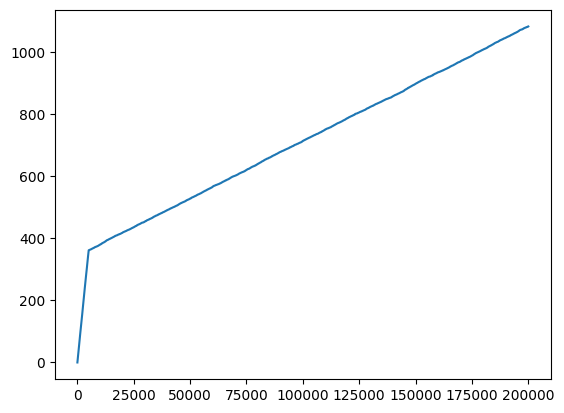

In [18]:
result = run(epsilon_greedy, payouts, 0.05)
chosen_arms = result[1]
print(f"Оптимальный вариант - {result[0]}")
regrets = best_payout - np.vectorize(lambda x: np.array(payouts)[int(x)])(chosen_arms)
plt.plot(np.cumsum(regrets))

# Softmax

Оптимальный вариант - 9


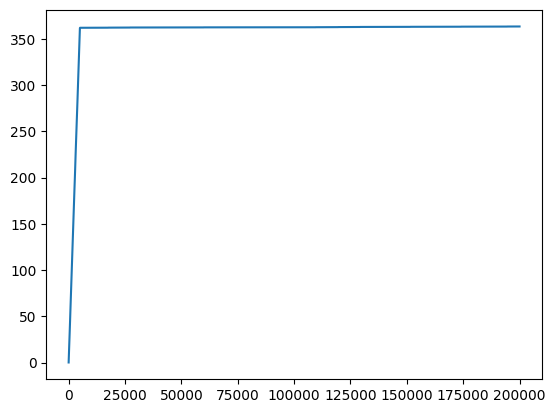

In [19]:
result = run(softmax, payouts, 0.005)
chosen_arms = result[1]
print(f"Оптимальный вариант - {result[0]}")
regrets = best_payout - np.vectorize(lambda x: np.array(payouts)[int(x)])(chosen_arms)
plt.plot(np.cumsum(regrets))

# UCB

Оптимальный вариант - 9


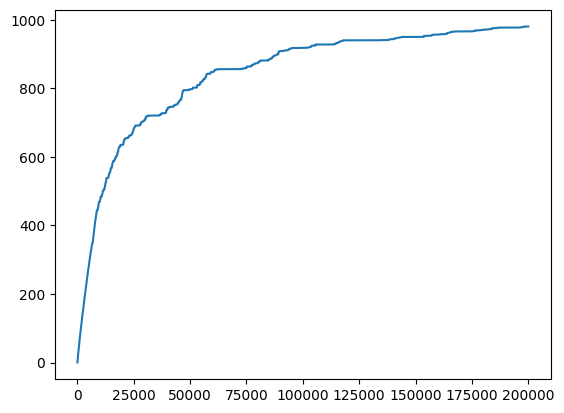

In [24]:
result = run(UCB, payouts, learning_attempts=500)
chosen_arms = result[1]
print(f"Оптимальный вариант - {result[0]}")
regrets = best_payout - np.vectorize(lambda x: np.array(payouts)[int(x)])(chosen_arms)
plt.plot(np.cumsum(regrets))

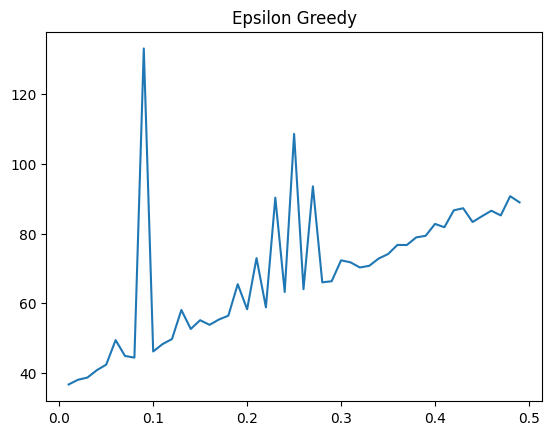

In [26]:
all_regrets = []
epsilon_range = [x/100 for x in range(1, 50)]
for epsilon in epsilon_range:
    result = run(epsilon_greedy, payouts, epsilon)
    all_regrets.append((best_payout - np.vectorize(lambda x: np.array(payouts)[int(x)])(result[1])).sum())
plt.title("Epsilon Greedy")
plt.plot(epsilon_range, all_regrets)

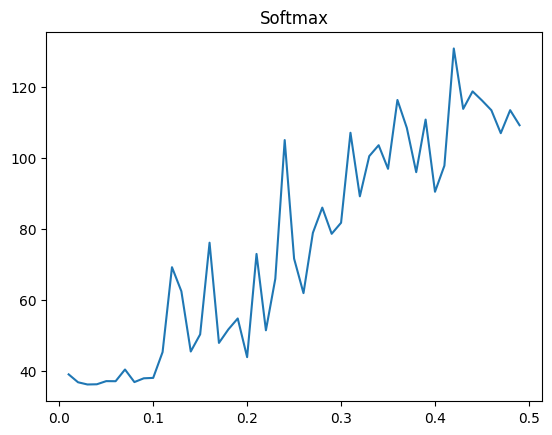

In [27]:
all_regrets = []
tau_range = [x/1000 for x in range(1, 50)]
for epsilon in tau_range:
    result = run(softmax, payouts, epsilon)
    all_regrets.append((best_payout - np.vectorize(lambda x: np.array(payouts)[int(x)])(result[1])).sum())
plt.title("Softmax")
plt.plot(epsilon_range, all_regrets)